### 성별 분류
- 데이터셋 : gender.csv
- 피쳐/속성 : long_hair, forehead_width_c, forehead_height_cm, nose_wide, nose_long, lips_thin, distance_nose_to_lip_long
- 타겟/라벨 : gender
- 학습 방법 : 지도학습 > 분류
- 알고리즘 : 랜덤포레스트

In [1]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from joblib import dump, load

In [2]:
# 데이터 불러오기
file = './gender.csv'
genderDF = pd.read_csv(file)

In [3]:
genderDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


- 데이터 오버샘플링

In [4]:
bootstrap_samples = genderDF.sample(n=1000, replace=True, random_state=10)
bootstrap_samples

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
1289,1,15.0,6.7,1,1,1,1,Male
4623,1,13.6,5.5,0,0,0,0,Female
1344,1,13.1,5.6,1,1,0,0,Male
3441,1,14.3,6.2,1,1,0,1,Male
1180,1,11.4,6.0,0,1,0,0,Female
...,...,...,...,...,...,...,...,...
1344,1,13.1,5.6,1,1,0,0,Male
836,1,13.5,5.9,0,1,0,0,Female
2202,1,13.1,5.6,0,0,1,0,Female
251,1,12.3,5.8,1,0,0,1,Male


In [5]:
boot_genderDF = pd.concat([genderDF, bootstrap_samples]).reset_index(drop=True)
boot_genderDF

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
5996,1,13.1,5.6,1,1,0,0,Male
5997,1,13.5,5.9,0,1,0,0,Female
5998,1,13.1,5.6,0,0,1,0,Female
5999,1,12.3,5.8,1,0,0,1,Male


In [6]:
# 성별 숫자 바꾸기
boot_genderDF['gender'].replace({'Male':0, 'Female':1}, inplace=True)
boot_genderDF

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...
5996,1,13.1,5.6,1,1,0,0,0
5997,1,13.5,5.9,0,1,0,0,1
5998,1,13.1,5.6,0,0,1,0,1
5999,1,12.3,5.8,1,0,0,1,0


In [7]:
# 데이터 확인
boot_genderDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  6001 non-null   int64  
 1   forehead_width_cm          6001 non-null   float64
 2   forehead_height_cm         6001 non-null   float64
 3   nose_wide                  6001 non-null   int64  
 4   nose_long                  6001 non-null   int64  
 5   lips_thin                  6001 non-null   int64  
 6   distance_nose_to_lip_long  6001 non-null   int64  
 7   gender                     6001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 375.2 KB


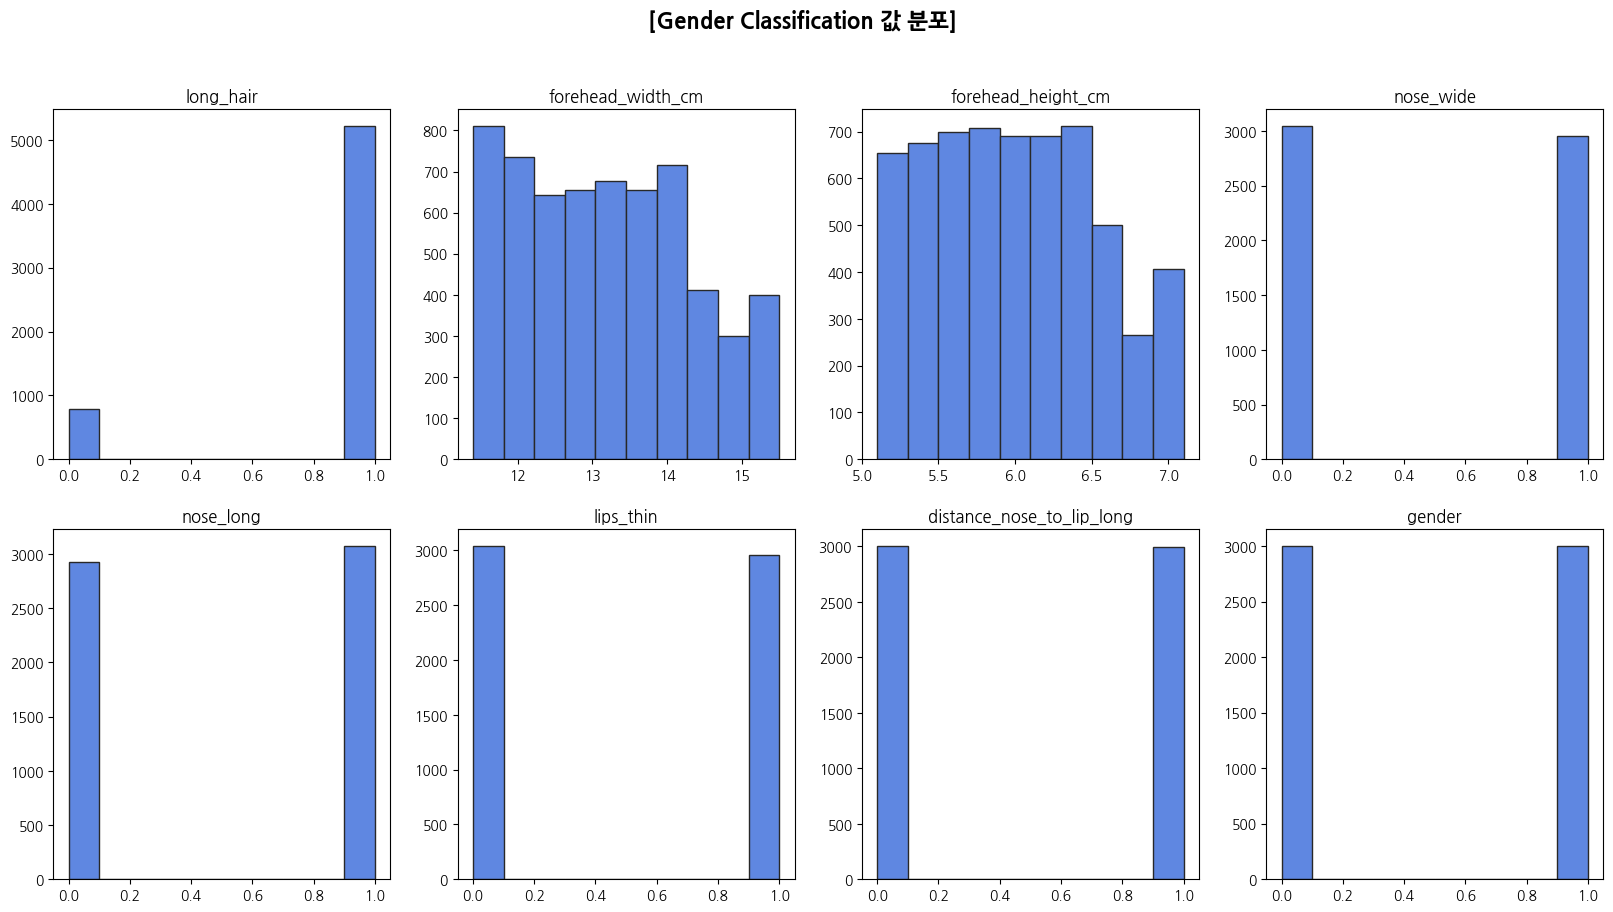

In [8]:
# 시각화 - 히스토그램
fig, ax = plt.subplots(2,4,figsize=(20,10))
plt.suptitle('[Gender Classification 값 분포]', fontsize=16, fontweight = 'bold')
for idx in range(8) : 
    ax[idx//4][idx%4].hist(boot_genderDF[boot_genderDF.columns[idx]], color = '#5F87E1', edgecolor='#282828')
    ax[idx//4][idx%4].set_title(f'{boot_genderDF.columns[idx]}')

## 학습

In [9]:
featureDF = boot_genderDF[boot_genderDF.columns[:-1]]
targetSR = boot_genderDF['gender']

In [10]:
# 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state = 10)

In [11]:
print(f'X_train : {X_train.shape}  Dimension : {X_train.ndim}D')
print(f'X_test  : {X_test.shape}  Dimension : {X_test.ndim}D')

print(f'y_train : {y_train.shape}  Dimension : {y_train.ndim}D')
print(f'y_test  : {y_test.shape}  Dimension : {y_test.ndim}D')

X_train : (4800, 7)  Dimension : 2D
X_test  : (1201, 7)  Dimension : 2D
y_train : (4800,)  Dimension : 1D
y_test  : (1201,)  Dimension : 1D


In [12]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train, y_train)
print(f'원본 데이터 - Train Score : {rf_model.score(X_train, y_train):.5f}   Test Score : {rf_model.score(X_test, y_test):.5f}')

원본 데이터 - Train Score : 0.99896   Test Score : 0.97585


## MinMax Scaling

In [13]:
mmscaler = MinMaxScaler()
mmscaler.fit(X_train[['forehead_width_cm','forehead_height_cm']])

MinMaxScaler()

In [14]:
mm_X_train = mmscaler.transform(X_train[['forehead_width_cm','forehead_height_cm']])
mm_X_test = mmscaler.transform(X_test[['forehead_width_cm','forehead_height_cm']])

In [15]:
mmsc_X_train = X_train.copy()
mmsc_X_test = X_test.copy()

In [16]:
mmsc_X_train[['forehead_width_cm', 'forehead_height_cm']] = mm_X_train
mmsc_X_test[['forehead_width_cm', 'forehead_height_cm']] = mm_X_test

#### 학습

In [17]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(mmsc_X_train, y_train)
print(f'MinMax Scaling 데이터 - Train Score : {rf_model.score(mmsc_X_train, y_train):.5f}   Test Score : {rf_model.score(mmsc_X_test, y_test):.5f}')

MinMax Scaling 데이터 - Train Score : 0.99896   Test Score : 0.97585


## Standard Scaling

In [18]:
ssScaler = StandardScaler()
ssScaler.fit(X_train[['forehead_width_cm','forehead_height_cm']])

StandardScaler()

In [19]:
stan_X_train = ssScaler.transform(X_train[['forehead_width_cm','forehead_height_cm']])
stan_X_test = ssScaler.transform(X_test[['forehead_width_cm','forehead_height_cm']])

In [20]:
ss_X_train = X_train.copy()
ss_X_test = X_test.copy()

In [21]:
ss_X_train[['forehead_width_cm', 'forehead_height_cm']] = stan_X_train
ss_X_test[['forehead_width_cm', 'forehead_height_cm']] = stan_X_test

#### 학습

In [22]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(ss_X_train, y_train)
print(f'Standard Scaling 데이터 - Train Score : {rf_model.score(ss_X_train, y_train):.5f}   Test Score : {rf_model.score(ss_X_test, y_test):.5f}')

Standard Scaling 데이터 - Train Score : 0.99896   Test Score : 0.97502


원본 데이터 - Train Score : 0.99896   Test Score : 0.97585  
MinMax Scaling 데이터 - Train Score : 0.99896   Test Score : 0.97585  
Standard Scaling 데이터 - Train Score : 0.99896   Test Score : 0.97502  

=> MinMax 스케일링 데이터 선택

In [23]:
rf_model = RandomForestClassifier(random_state=10, oob_score=True, n_estimators=200)
rf_model.fit(mmsc_X_train,y_train)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=10)

In [24]:
pred = rf_model.predict(mmsc_X_test)

In [25]:
print(f'accuracy_score : {accuracy_score(y_test,pred):.3f}')

accuracy_score : 0.976


In [26]:
params = {'max_depth':range(2,10), 'min_samples_leaf' : range(1,10), 'criterion':['gini', 'entropy', 'log_loss'],'max_features':['sqrt','log2', None]}

In [27]:
rf_cv = GridSearchCV(rf_model, param_grid=params, refit=True, verbose=3)
rf_cv.fit(mmsc_X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1;, score=0.975 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1;, score=0.979 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1;, score=0.956 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1;, score=0.970 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1;, score=0.960 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2;, score=0.975 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2;, score=0.979 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2;, score=0.956 total time=   0.5s
[CV 4/5] END criterion=gini, max

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200, oob_score=True,
                                              random_state=10),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 10),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': range(1, 10)},
             verbose=3)

In [28]:
# 모델 파라미터
print(f'best_score_ : {rf_cv.best_score_}')
print(f'best_params_ : {rf_cv.best_params_}')
print(f'best_estimator_ : {rf_cv.best_estimator_}')

best_score_ : 0.978125
best_params_ : {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1}
best_estimator_ : RandomForestClassifier(max_depth=7, n_estimators=200, oob_score=True,
                       random_state=10)


In [29]:
best = rf_cv.best_estimator_
best.fit(mmsc_X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, oob_score=True,
                       random_state=10)

In [30]:
print(f'oob score : {best.oob_score_:.4f}')
print(f'model test score : {best.score(mmsc_X_test,y_test):.4f}')

oob score : 0.9771
model test score : 0.9750


In [31]:
predict = best.predict(mmsc_X_test)

In [32]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[580,  21],
       [  9, 591]], dtype=int64)

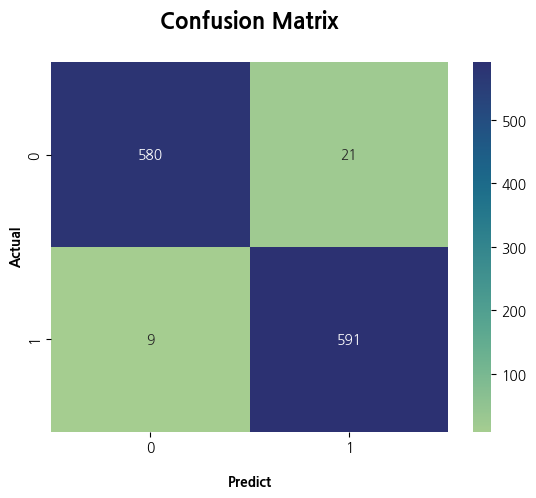

In [33]:
sns.heatmap(matrix, annot=matrix,fmt='d',cmap="crest")
plt.xlabel('\nPredict', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.title('Confusion Matrix\n', fontsize=16, fontweight='bold')
plt.show()

In [34]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       601
           1       0.97      0.98      0.98       600

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201



support : 각 라벨의 실제 샘플 개수  
macro avg : 평균에 평균을 내는 개념 / 단순 평균  
weighted avg : 각 클래스에 속하는 표본의 개수로 가중 평균을 내서 계산하는 방법 / 샘플 개수의 불균형을 고려

In [35]:
feature = best.feature_importances_
feature

array([0.00123139, 0.05902717, 0.04428648, 0.28604184, 0.21000237,
       0.19427298, 0.20513779])

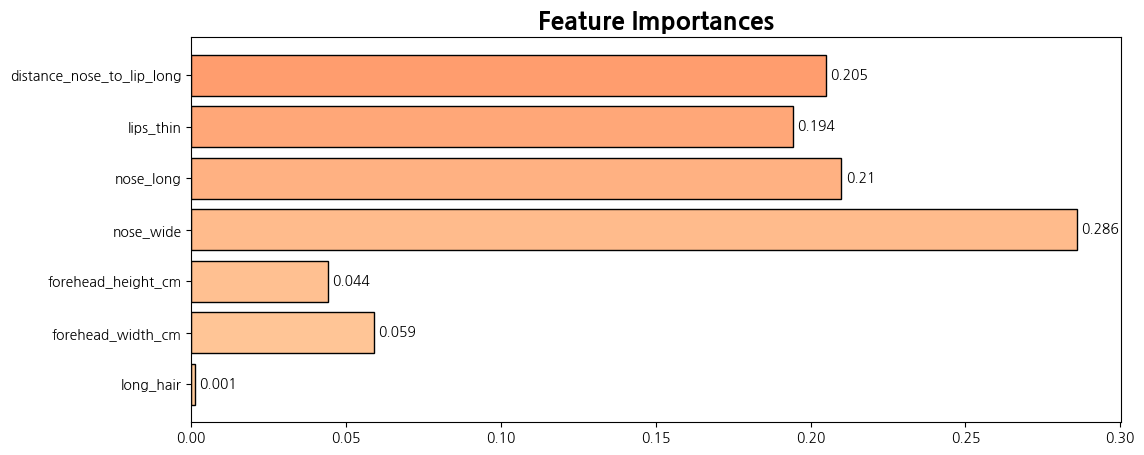

In [36]:
colors = ['#FF7F50','#FF895A', '#FF9364', '#FF9D6E', '#FFA778', '#FFB182', '#FFBB8C', '#FFC091', '#FFC596', '#FFCA9B']
colors.reverse()
plt.figure(figsize=(12,5))
result = plt.barh(featureDF.columns.to_list(), feature, color = colors, edgecolor = 'k')
plt.bar_label(result, np.round(feature,3),padding=3)
plt.title('Feature Importances', fontsize = 18, fontweight='bold')
plt.show()

In [37]:
prob = best.predict_proba(mmsc_X_test)[:,1]
prob

array([0.00000000e+00, 9.97489785e-01, 9.73015909e-01, ...,
       3.95610922e-05, 1.03319911e-02, 5.84112150e-06])

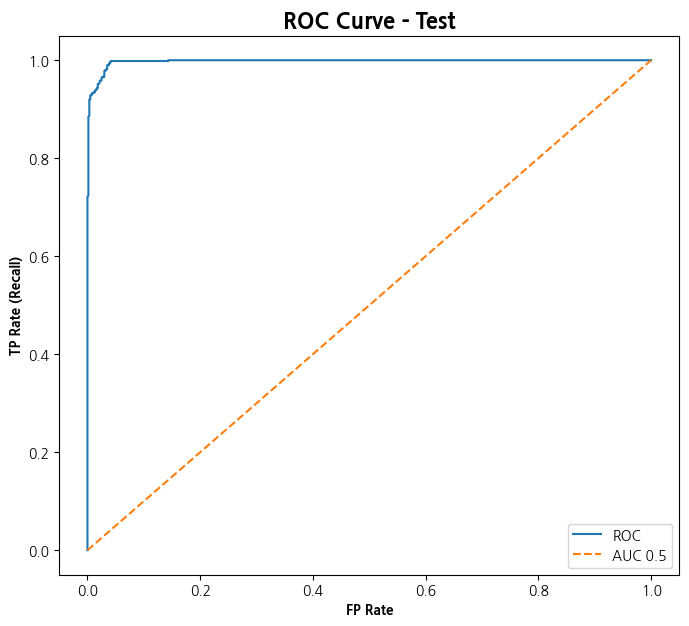

In [38]:
fpr,tpr,threshold = roc_curve(y_test, prob)
plt.figure(figsize=(8,7))
plt.plot(fpr,tpr, label = 'ROC')
plt.plot([0,1],[0,1], '--', label = 'AUC 0.5')
plt.xlabel('FP Rate', fontweight='bold')
plt.ylabel('TP Rate (Recall)', fontweight='bold')
plt.title('ROC Curve - Test', fontsize = 16, fontweight='bold')
plt.legend()
plt.show()

In [39]:
print(f'roc_auc_score : {roc_auc_score(y_test, prob):.3f}')

roc_auc_score : 0.998


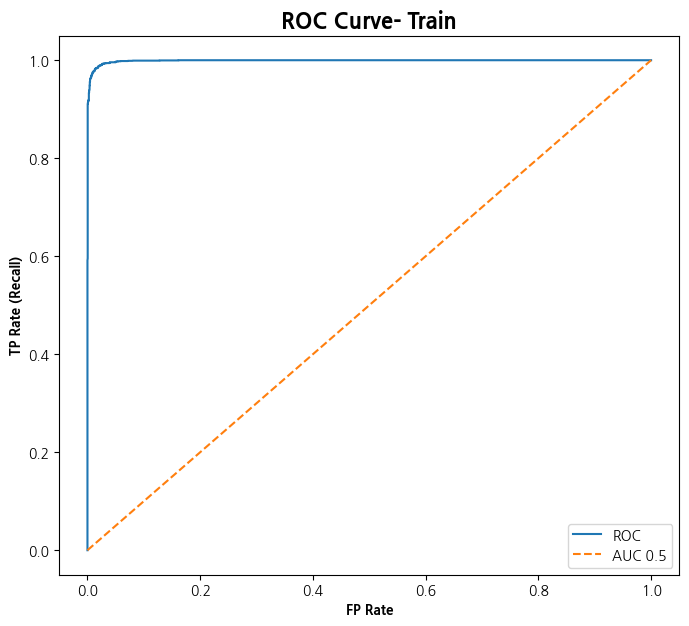

In [40]:
prob2 = best.predict_proba(mmsc_X_train)[:,1]

fpr,tpr,threshold = roc_curve(y_train, prob2)
plt.figure(figsize=(8,7))
plt.plot(fpr,tpr, label = 'ROC')
plt.plot([0,1],[0,1], '--', label = 'AUC 0.5')
plt.xlabel('FP Rate', fontweight='bold')
plt.ylabel('TP Rate (Recall)', fontweight='bold')
plt.title('ROC Curve- Train', fontsize = 16, fontweight='bold')
plt.legend()
plt.show()

In [41]:
roc_auc_score(y_train, prob2)

0.9988890623071288

### 연관성이 높은 피처로 다시 학습

In [42]:
# 상위 4개만 넣어보기
featureDF2 = boot_genderDF[boot_genderDF.columns[3:-1]]
targetSR = boot_genderDF['gender']

In [75]:
featureDF2

,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,0,1,1
1,0,0,1,0
2,1,1,1,1
3,0,1,1,1
4,0,0,0,0
...,...,...,...,...
5996,1,1,0,0
5997,0,1,0,0
5998,0,0,1,0
5999,1,0,0,1


In [43]:
# 학습용/테스트용 데이터 분리
X_train2, X_test2, y_train2, y_test2 = train_test_split(featureDF2, targetSR, test_size=0.2, random_state = 10)

In [44]:
rf_model2 = RandomForestClassifier(random_state=10)
rf_model2.fit(X_train2, y_train2)

RandomForestClassifier(random_state=10)

In [45]:
print(f'Train Score : {rf_model2.score(X_train2, y_train2):.5f}   Test Score : {rf_model2.score(X_test2, y_test2):.5f}')

Train Score : 0.96000   Test Score : 0.95587


In [46]:
# 점수가 더 떨어짐 => 변수 추가
featureDF3 = boot_genderDF[boot_genderDF.columns[1:-1]]
targetSR = boot_genderDF['gender']

In [47]:
# 학습용/테스트용 데이터 분리
X_train3, X_test3, y_train3, y_test3 = train_test_split(featureDF3, targetSR, test_size=0.2, random_state = 10)

In [48]:
rf_model3 = RandomForestClassifier(random_state=10)
rf_model3.fit(X_train3, y_train3)

RandomForestClassifier(random_state=10)

In [49]:
print(f'Train Score : {rf_model3.score(X_train3, y_train3):.5f}   Test Score : {rf_model3.score(X_test3, y_test3):.5f}')
# 점수 하락했지만 소수점 4번째자리 수준이기 때문에 하나 삭제

Train Score : 0.99854   Test Score : 0.97502


## MinMax Scaling

In [50]:
mmscaler = MinMaxScaler()
mmscaler.fit(X_train3[['forehead_width_cm','forehead_height_cm']])

MinMaxScaler()

In [51]:
mm_X_train = mmscaler.transform(X_train3[['forehead_width_cm','forehead_height_cm']])
mm_X_test = mmscaler.transform(X_test3[['forehead_width_cm','forehead_height_cm']])

In [52]:
mmsc_X_train = X_train3.copy()
mmsc_X_test = X_test3.copy()

In [53]:
mmsc_X_train[['forehead_width_cm', 'forehead_height_cm']] = mm_X_train
mmsc_X_test[['forehead_width_cm', 'forehead_height_cm']] = mm_X_test

#### 학습

In [54]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(mmsc_X_train, y_train3)
print(f'MinMax Scaling 데이터 - Train Score : {rf_model.score(mmsc_X_train, y_train3):.5f}   Test Score : {rf_model.score(mmsc_X_test, y_test3):.5f}')

MinMax Scaling 데이터 - Train Score : 0.99854   Test Score : 0.97585


## Standard Scaling

In [55]:
ssScaler = StandardScaler()
ssScaler.fit(X_train3[['forehead_width_cm','forehead_height_cm']])

StandardScaler()

In [56]:
stan_X_train = ssScaler.transform(X_train3[['forehead_width_cm','forehead_height_cm']])
stan_X_test = ssScaler.transform(X_test3[['forehead_width_cm','forehead_height_cm']])

In [57]:
ss_X_train = X_train3.copy()
ss_X_test = X_test3.copy()

In [58]:
ss_X_train[['forehead_width_cm', 'forehead_height_cm']] = stan_X_train
ss_X_test[['forehead_width_cm', 'forehead_height_cm']] = stan_X_test

#### 학습

In [59]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(ss_X_train, y_train)
print(f'Standard Scaling 데이터 - Train Score : {rf_model.score(ss_X_train, y_train):.5f}   Test Score : {rf_model.score(ss_X_test, y_test):.5f}')

Standard Scaling 데이터 - Train Score : 0.99854   Test Score : 0.97669


원본 데이터 - Train Score : 0.99854   Test Score : 0.97502   
MinMax Scaling 데이터 - Train Score : 0.99854   Test Score : 0.97585    
Standard Scaling 데이터 - Train Score : 0.99854   Test Score : 0.97669    

=> Standard Scaling 데이터 선택

In [76]:
rf_model3 = RandomForestClassifier(random_state=10, oob_score=True, n_estimators=200)
rf_model3.fit(X_train3,y_train3)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=10)

In [77]:
tr_pred = rf_model3.predict(X_train3)
tt_pred = rf_model3.predict(X_test3)

In [78]:
print(f'train score : {rf_model3.score(X_train3,y_train3):.4f}')
print(f'test score  : {rf_model3.score(X_test3,y_test3):.4f}')

train score : 0.9985
test score  : 0.9759


In [79]:
params = {'max_depth':range(2,10), 'min_samples_leaf' : range(1,10), 'criterion':['gini', 'entropy', 'log_loss'],'max_features':['sqrt','log2', None]}

In [80]:
rf_cv2 = GridSearchCV(rf_model3, param_grid=params, refit=True, verbose=3)
rf_cv2.fit(X_train3, y_train3)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1;, score=0.975 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1;, score=0.977 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1;, score=0.956 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1;, score=0.972 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1;, score=0.956 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2;, score=0.975 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2;, score=0.977 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2;, score=0.956 total time=   0.3s
[CV 4/5] END criterion=gini, max

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200, oob_score=True,
                                              random_state=10),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 10),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': range(1, 10)},
             verbose=3)

In [81]:
# 모델 파라미터
print(f'best_score_ : {rf_cv2.best_score_}')
print(f'best_params_ : {rf_cv2.best_params_}')
print(f'best_estimator_ : {rf_cv2.best_estimator_}')

best_score_ : 0.9766666666666668
best_params_ : {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1}
best_estimator_ : RandomForestClassifier(max_depth=7, n_estimators=200, oob_score=True,
                       random_state=10)


In [82]:
best_rf = rf_cv2.best_estimator_
best_rf.fit(X_train3, y_train3)

RandomForestClassifier(max_depth=7, n_estimators=200, oob_score=True,
                       random_state=10)

In [83]:
# 객체 저장
dump(best_rf, 'model.joblib')

['model.joblib']

In [84]:
print(f'oob score : {best_rf.oob_score_:.4f}')
print(f'model test score : {best_rf.score(mmsc_X_test,y_test3):.4f}')

oob score : 0.9771
model test score : 0.9117


In [85]:
predict2 = best_rf.predict(X_test3)

In [86]:
matrix = confusion_matrix(y_test3, predict)
matrix

array([[580,  21],
       [  9, 591]], dtype=int64)

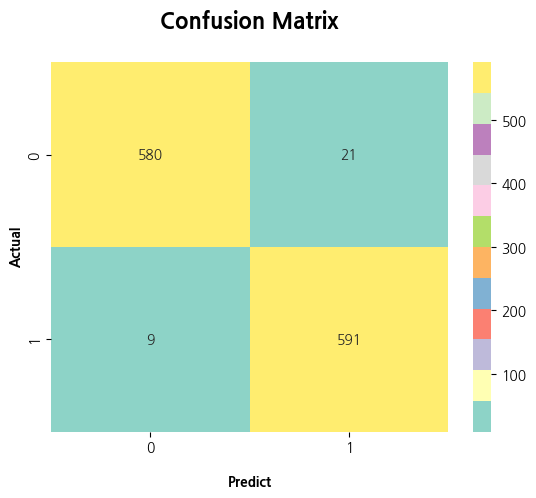

In [87]:
sns.heatmap(matrix, annot=matrix,fmt='d',cmap='Set3')
plt.xlabel('\nPredict', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.title('Confusion Matrix\n', fontsize=16, fontweight='bold')
plt.show()

In [88]:
print(classification_report(y_test3,predict2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       601
           1       0.96      0.98      0.97       600

    accuracy                           0.97      1201
   macro avg       0.97      0.97      0.97      1201
weighted avg       0.97      0.97      0.97      1201



In [104]:
# 객체 로드
model = load('./model.joblib')

In [136]:
column = ['forehead_width_cm', 'forehead_height_cm', 'nose_wide','nose_long', 'lips_thin', 'distance_nose_to_lip_long']
data = '12.8,5.4,1,1,0,1'
new_data=[12.8,5.4,1,1,0,1]
list = data.split(',')
list

['12.8', '5.4', '1', '1', '0', '1']

In [133]:
# new_data = []
# for d in data:
#     new_data.append(int(d))
# print(new_data)

In [139]:
df = pd.DataFrame([list], columns=column)
df

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,12.8,5.4,1,1,0,1


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   forehead_width_cm          1 non-null      object
 1   forehead_height_cm         1 non-null      object
 2   nose_wide                  1 non-null      object
 3   nose_long                  1 non-null      object
 4   lips_thin                  1 non-null      object
 5   distance_nose_to_lip_long  1 non-null      object
dtypes: object(6)
memory usage: 176.0+ bytes


In [126]:
df['forehead_width_cm'] = df['forehead_width_cm'].astype('float32')
df['forehead_height_cm'] = df['forehead_height_cm'].astype('float32')
df['nose_wide'] = df['nose_wide'].astype('int')
df['nose_long'] = df['nose_long'].astype('int')
df['lips_thin'] = df['lips_thin'].astype('int')
df['distance_nose_to_lip_long'] = df['distance_nose_to_lip_long'].astype('int')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   forehead_width_cm          1 non-null      float32
 1   forehead_height_cm         1 non-null      float32
 2   nose_wide                  1 non-null      int32  
 3   nose_long                  1 non-null      int32  
 4   lips_thin                  1 non-null      int32  
 5   distance_nose_to_lip_long  1 non-null      int32  
dtypes: float32(2), int32(4)
memory usage: 152.0 bytes


In [128]:
result = model.predict(df)
target = ['남성', '여성']
print(f'예측 결과 : 당신의 성별은 {target[result[0]]}입니다.')

예측 결과 : 당신의 성별은 남성입니다.


In [140]:
def preprocessing(text):
    column = ['forehead_width_cm', 'forehead_height_cm', 'nose_wide','nose_long', 'lips_thin', 'distance_nose_to_lip_long']
    data = text.split(',')
    df = pd.DataFrame([data],columns=column)
    df['forehead_width_cm'] = df['forehead_width_cm'].astype('float32')
    df['forehead_height_cm'] = df['forehead_height_cm'].astype('float32')
    df['nose_wide'] = df['nose_wide'].astype('int')
    df['nose_long'] = df['nose_long'].astype('int')
    df['lips_thin'] = df['lips_thin'].astype('int')
    df['distance_nose_to_lip_long'] = df['distance_nose_to_lip_long'].astype('int')

    return df

In [141]:
preprocessing('12.8','5.4','1','1','0','1')

TypeError: preprocessing() takes 1 positional argument but 6 were given